<a href="https://colab.research.google.com/github/ancka019/ComputationsMethods6sem/blob/main/hw7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import math
from numpy.linalg import norm

In [2]:
def find_coefs(segment, funs, conditions, h): #находим коэффициенты для СЛАУ
    a,b = segment
    alpha0,alpha1,beta0,beta1,A_c,B_c = conditions
    k,p,q,f = funs
    n = round((b-a)/h)
    x = np.float_([a+i*h for i in range(n+1)])
    A = np.float_([0,*[ 2 * k(x[i])-h*p(x[i]) for i in range(1,n)],-beta1])
    B = np.float_([h*alpha0 - alpha1,*[-4 * k(x[i]) + 2 * h * h * q(x[i]) for i in range(1,n)], h*beta0+beta1])
    C = np.float_([alpha1,*[2 * k(x[i]) + h * p(x[i]) for i in range(1,n)],0])
    D = np.float_([h*A_c,*[2 * h * h * f(x[i]) for i in range(1,n)],h*B_c])
    return A,B,C,D

In [3]:
def solution(segment, funs, conditions, h): #решаем СЛАУ с полученными коэффициентами
    a,b = segment
    n = round((b - a) / h)
    A, B, C, D = find_coefs(segment,funs,conditions,h)
    s,t,u = [np.zeros(n+1,dtype=float) for _ in range(3)]
    s[0] = -C[0]/B[0]
    t[0] = D[0]/B[0]
    for i in range(1, n + 1):
        s[i] = -C[i]/(A[i]*s[i-1]+B[i])
        t[i] = (D[i]-A[i]*t[i-1])/(A[i]*s[i-1]+B[i])
    u[n] = t[n]
    for i in range(n-1,-1,-1):
        u[i] = s[i]*u[i + 1]+t[i]
    return u

In [4]:
def grid(segment, funs, conditions, h, eps):
    a,b = segment
    coef = 2
    k = 0
    v2 = solution(segment,funs,conditions,h)
    while True:
        k += 1
        v1 = v2
        v2 = solution(segment,funs,conditions,h/(coef**k))
        err = np.float_([(v2[2*i]-v1[i])/(coef**1-1) for i in range(v1.shape[0])]) 
        if norm(err) < eps:
            for i in range(len(err)):
                if i % 2 == 0:
                    v2[2*i] += err[i]
                else:
                    v2[i] += (err[i - 1] + err[i + 1]) / 2
            x = np.zeros(v2.shape[0], dtype=float)
            for i in range(v2.shape[0]):
                x[i] = a + i * h / (coef ** k)
            return x, v2, h/(coef ** k), k

In [6]:
funs = [] #массив из наборов функций k,p,q,f
funs.append([lambda x: -1,
            lambda x: 0,
            lambda x: x**2,
            lambda x: (math.pi**2/4+x**2)*math.cos(math.pi*x/2)])

funs.append([lambda x: -1/(x+3),
            lambda x: -x,
            lambda x: math.log(2+x),
            lambda x: 1-x/2])

funs.append([lambda x: (x-2)/(x+2),
            lambda x: x,
            lambda x: 1-math.sin(x),
            lambda x: x**2])

conditions = [] #массив граничных условий
conditions.append([1,0,1,0,1,0])
conditions.append([0,1,0.5,0,0,0])
conditions.append([1,0,1,0,0,0])

segments = [] #массив отрезков
segments.extend([[0,1],[-1,1],[-1,1]])

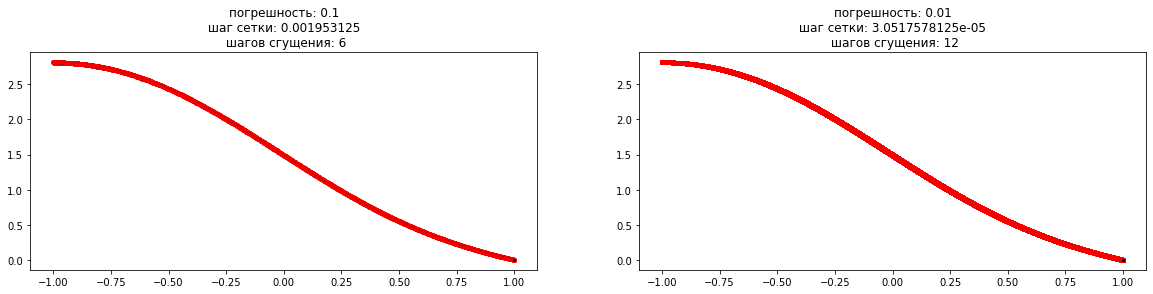

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
i = 0
for eps in [0.1,0.01]:
    x_sol,y_sol,h_new,k = grid(segments[1],funs[1],conditions[1],1/8,eps)
    axes[i].plot(x_sol, y_sol, marker='.', color='black', mec='red', ms=8)
    axes[i].set_title("погрешность: {}\n шаг сетки: {} \n шагов сгущения: {}".format(eps,h_new,k))
    i+=1

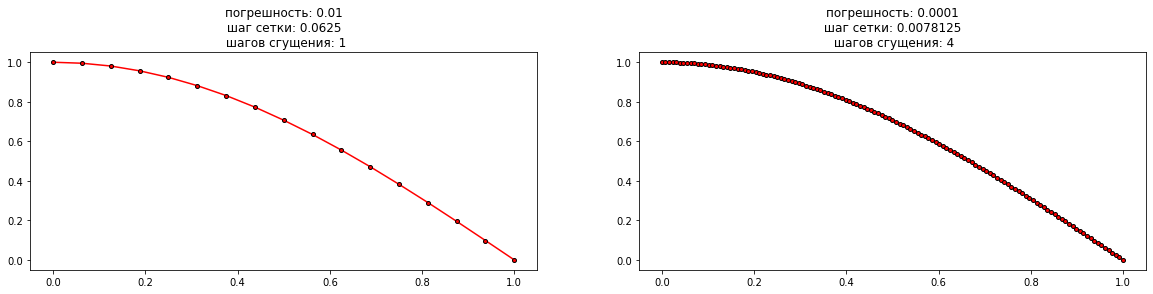

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(20, 4))
i = 0
for eps in [1e-2,1e-4]:
    x_sol,y_sol,h_new,k = grid(segments[0],funs[0],conditions[0],1/8,eps)
    axes[i].plot(x_sol, y_sol, marker='.', color='red', mec='black', ms=8)
    axes[i].set_title("погрешность: {}\n шаг сетки: {} \n шагов сгущения: {}".format(eps,h_new,k))
    i+=1

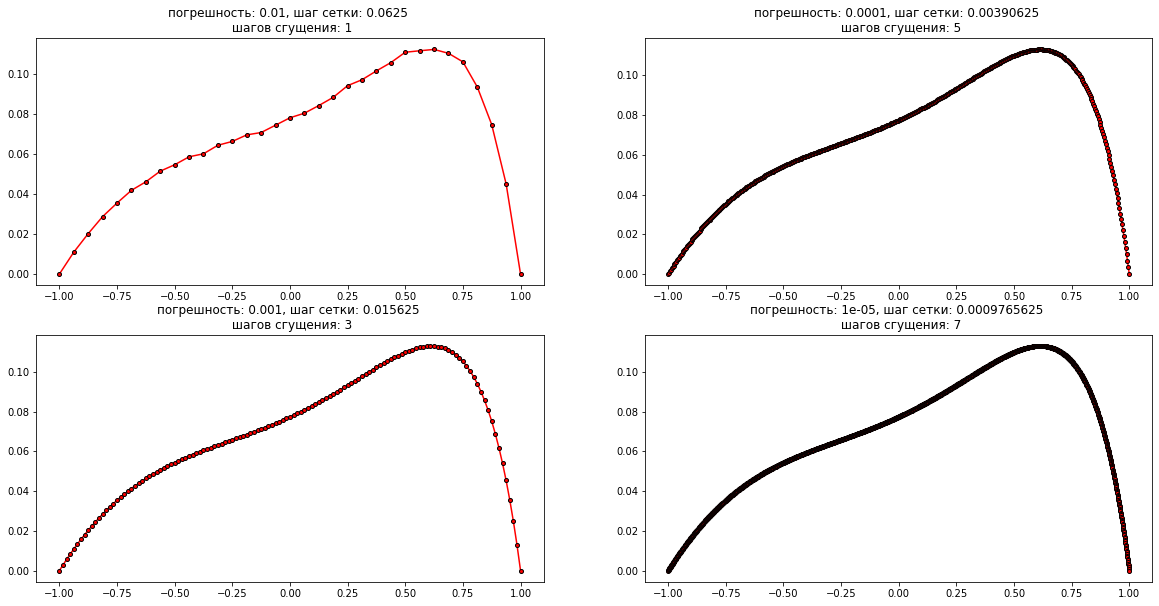

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
i,j = 0,0
for eps in [1e-2,1e-3,1e-4,1e-5]:
    x_sol,y_sol,h_new,k = grid(segments[2],funs[2],conditions[2],1/8,eps)
    axes[i,j].plot(x_sol, y_sol, marker='.', color='red', mec='black', ms=8)
    axes[i,j].set_title("погрешность: {}, шаг сетки: {} \n шагов сгущения: {}".format(eps,h_new,k))
    if i!=1:
        i+=1
    else:
        j = 1
        i = 0